In [1]:
import seaborn as sns
import osmnx as ox
ox.config(log_console = True, use_cache = True)
ox.__version__
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

In [2]:
import geopandas as gpd
import networkx as nx
import requests
from shapely.ops import cascaded_union
from shapely.geometry import Point, Polygon

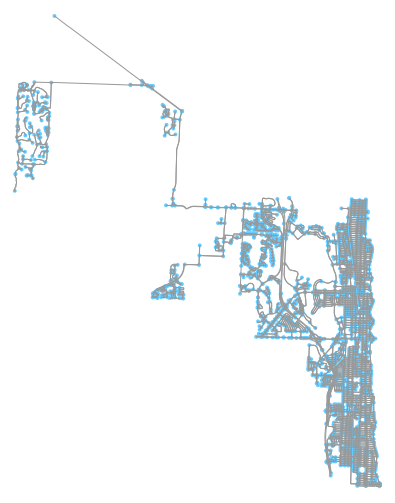

In [3]:
West_Palm = ox.graph_from_place('West Palm Beach, Florida, US', network_type='drive')
fig, ax = ox.plot_graph(West_Palm, fig_height = 9)

In [4]:
West_Palm_proj = ox.project_graph(West_Palm)
node_proj = ox.graph_to_gdfs(West_Palm_proj, edges = False)
graph_area_m = node_proj.unary_union.convex_hull.area
graph_area_m

186040584.86537635

In [5]:
ox.basic_stats(West_Palm_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')

{'n': 3062,
 'm': 8029,
 'k_avg': 5.244284781188766,
 'intersection_count': 2594,
 'streets_per_node_avg': 2.971913781841933,
 'streets_per_node_counts': {0: 0, 1: 468, 2: 7, 3: 1766, 4: 789, 5: 28, 6: 4},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.15284128020901372,
  2: 0.0022860875244937948,
  3: 0.5767472240365774,
  4: 0.25767472240365774,
  5: 0.009144350097975179,
  6: 0.0013063357282821686},
 'edge_length_total': 1121812.4580000006,
 'edge_length_avg': 139.7200719890398,
 'street_length_total': 656528.9229999991,
 'street_length_avg': 145.37841519043383,
 'street_segments_count': 4516,
 'node_density_km': 16.45877431645219,
 'intersection_density_km': 13.9431941792544,
 'edge_density_km': 6029.934053431257,
 'street_density_km': 3528.955380757806,
 'circuity_avg': 1.0582463830473727,
 'self_loop_proportion': 0.004110100884294433,
 'clean_intersection_count': 2133,
 'clean_intersection_density_km': 11.465240240689914}

In [6]:
West_Palm_stats = ox.extended_stats(West_Palm, ecc=True, bc=True, cc=True)

In [7]:
West_Palm_stats['radius']

14579.651000000002

In [8]:
West_Palm_stats['diameter']

28986.500999999997

In [9]:
edge_centrality = nx.closeness_centrality(nx.line_graph(West_Palm))

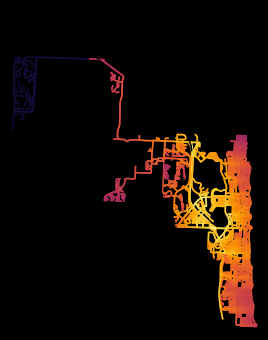

In [10]:
West_Palm_edge_values = [edge_centrality[edge + (0,)] for edge in West_Palm.edges()]

norm = colors.Normalize(vmin=min(West_Palm_edge_values)*0.8, vmax=max(West_Palm_edge_values))

cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)

ec = [cmap.to_rgba(cl) for cl in West_Palm_edge_values]

fig, ax = ox.plot_graph(West_Palm, bgcolor='k', axis_off=True, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=1)
